<a href="https://colab.research.google.com/github/Pallavigk-rnsit/collegedemo/blob/main/threat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CYBER THREAT DETECTION USING ML
Why Anomaly Detection is Suitable for Cyber Threat Detection
Detection of Unknown Threats:

Many cyber threats, such as zero-day attacks, are previously unseen and lack labeled examples in training data.
Anomaly detection identifies unusual patterns that deviate from normal behavior, making it effective for detecting unknown threats.
Unsupervised Nature:

In cybersecurity, obtaining labeled datasets (benign vs. malicious) is often difficult, as threats evolve rapidly.
Unsupervised learning models do not require labels, making them ideal for real-world cybersecurity applications.
Early Warning System:

**About Dataset:**   
 Dataset I have used for this kernel is labelled and reason for using this dataset is that I have to compare the result of algorithms. Due to confidentiality issues, features from V1 to V28 have been transformed using PCA and there is no missing value in the dataset.

**Content of this kernel:**

**Data preprocessing**

1.Exploratory Data Analysis

2.Features transformation

3.Features selection

**Modleing**

4.Isolation Forest

5.Local Outlier Factor

# **Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#for data preprocessing
from sklearn.decomposition import PCA

#for modeling
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

#filter warnings
import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("../content"))

# Any results you write to the current directory are saved as output.

['.config', 'cyber.csv', 'sample_data']


# **Exploratory Data Analysis**

In [ ]:
df = pd.read_csv("../content/cyber.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**Lets visualize how many fraud cases we have in this dataset**

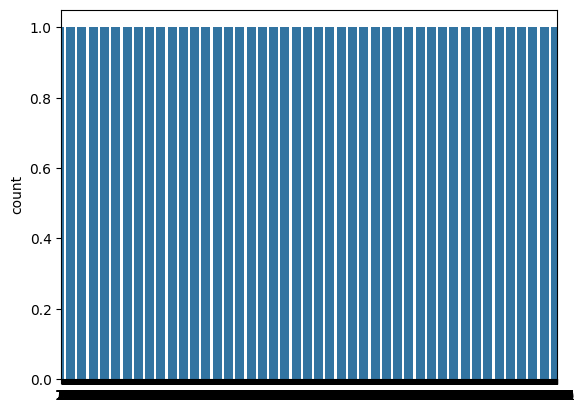

Class
0.0    2929
1.0       2
Name: count, dtype: int64


In [ ]:
sns.countplot(df.Class)
plt.show()
print(df.Class.value_counts())

We have 0.17% fraud cases in the dataset which are anomalies.

Only Time and Amount have not been transformed with PCA. Time contains the seconds elapsed between each transaction and the first transaction in the dataset. Lets transofrm this feature into hours to get a better understanding.

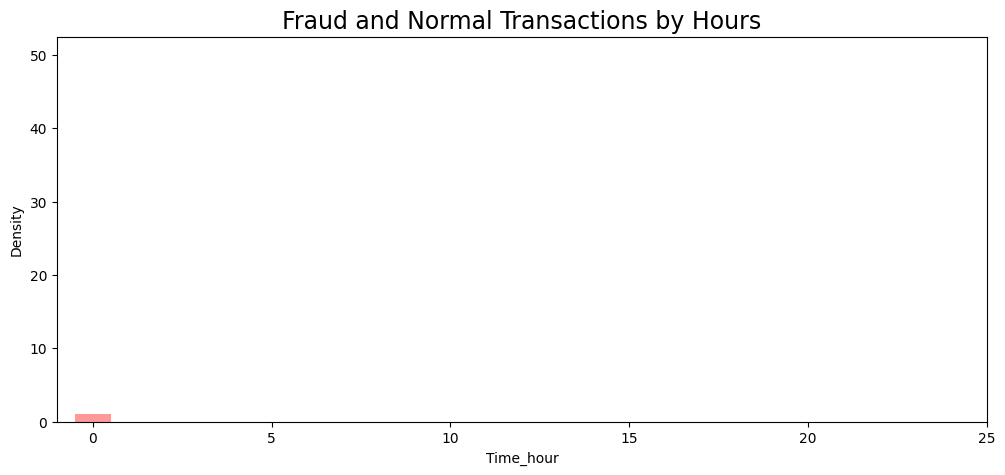

In [ ]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["Time_hour"], color='g')
sns.distplot(df[df['Class'] == 1]["Time_hour"], color='r')
plt.title('Fraud and Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

Seems like hour of day have some impact on number or fraud cases. Lets move to transform the remaining features.

Feature Transformation
Lets transform the remaining features using PCA.

In [ ]:
from sklearn.impute import SimpleImputer

cols = df[['Time', 'Amount']]

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
cols_imputed = imputer.fit_transform(cols)

pca = PCA(n_components=2)
X_PCA = pca.fit_transform(cols_imputed)

df['V29'] = X_PCA[:, 0]
df['V30'] = X_PCA[:, 1]

df.drop(['Time', 'Amount'], axis=1, inplace=True)

df.columns  # Display column names



Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Time_hour',
       'V29', 'V30'],
      dtype='object')

**Now lets have a view at distribution of features**

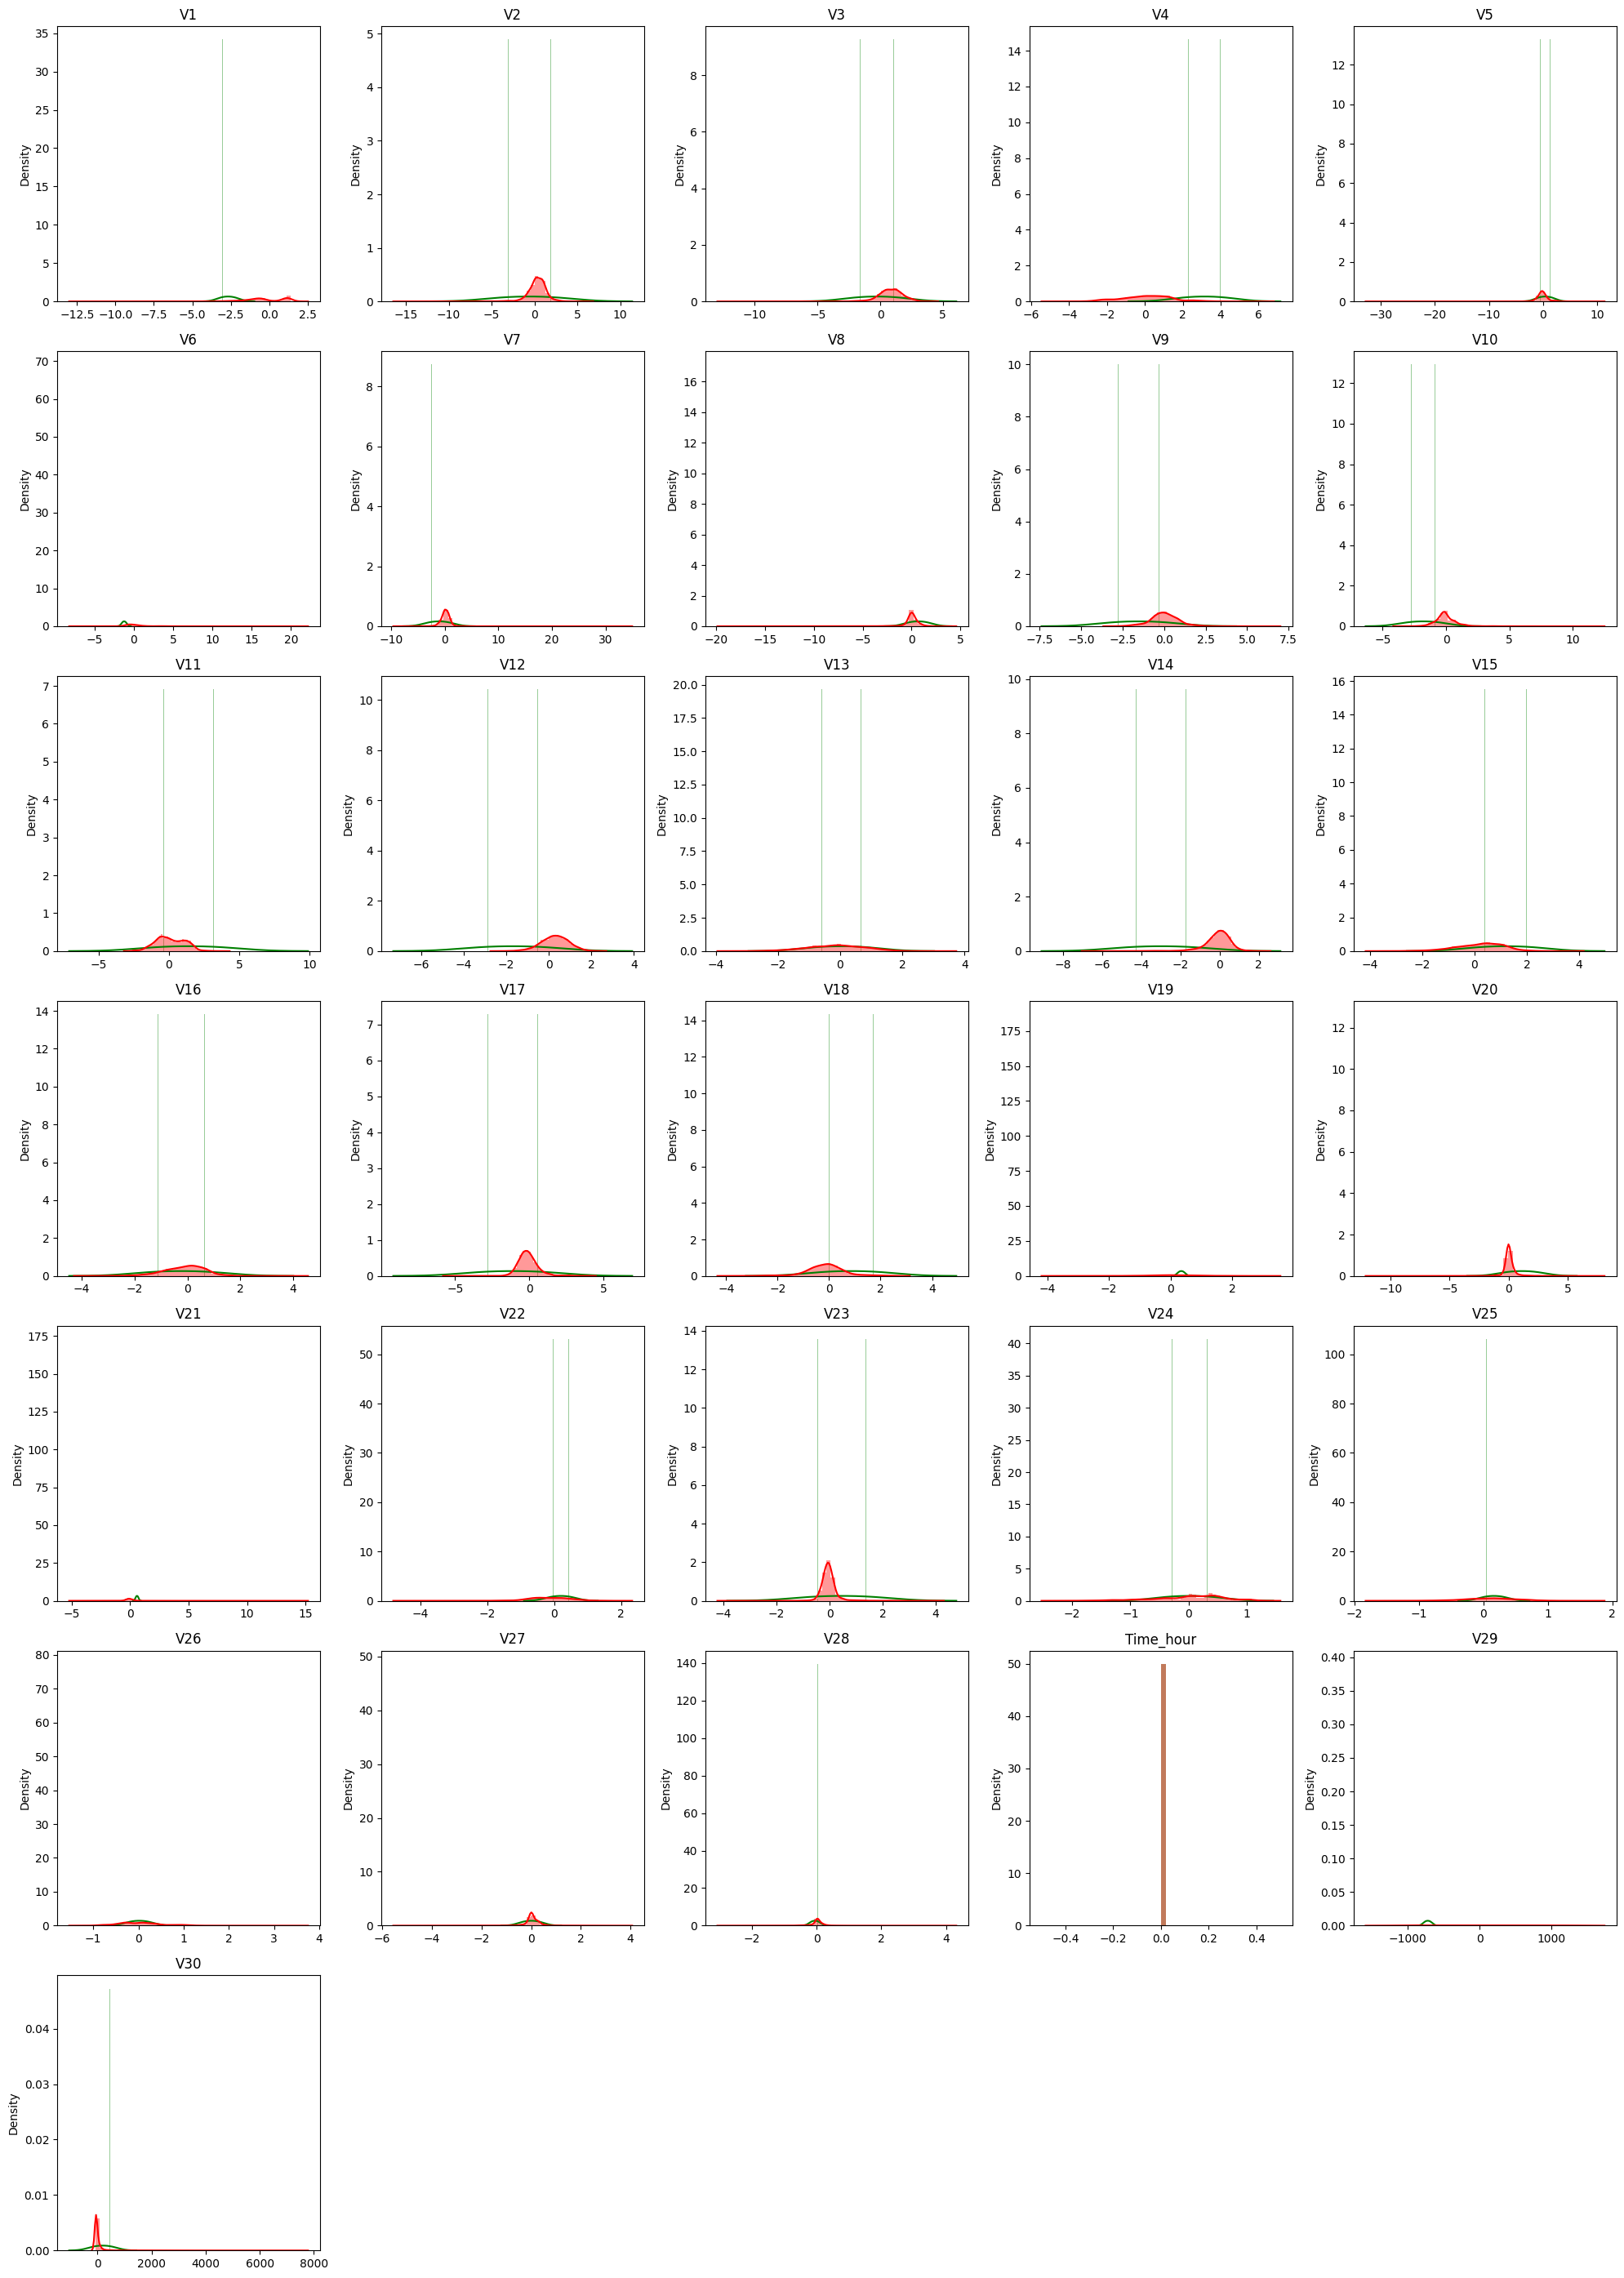

In [ ]:
columns = df.drop('Class', axis=1).columns
num_columns = len(columns)

# Dynamically calculate the grid size
rows = (num_columns // 5) + 1  # Adjust rows based on the number of columns
grid = gridspec.GridSpec(rows, 5)

plt.figure(figsize=(20, rows * 4))  # Adjust figure size accordingly

for n, col in enumerate(columns):
    ax = plt.subplot(grid[n])  # Use `grid[n]` within bounds
    sns.distplot(df[df.Class == 1][col], bins=50, color='g', kde=True)
    sns.distplot(df[df.Class == 0][col], bins=50, color='r', kde=True)
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


As we can see that data distribution of normal and fraud cases of some features like V18, V20, V25 are overlapping and they seem same. Such features are not good at differentiating between normal and fraud transactions.

**Feature Selection using Z-test**

Lets move to do some hypothesis testing to find statistically significant features. We will be performing Z-test with valid transactions as our population.

So the case is we have to find if the values of fraud transactions are significantly different from normal transaction or not for all features. The level of significance is 0.01 and its a two tailed test.

**Scenario:**

1.Valid transactions as our population

2.Fraud transactions as sample

3.Two tailed Z-test

4.Level of significance 0.01

5.Corresponding critical value is 2.58

**Hypothesis:**

H0: There is no difference (insignificant)

H1: There is a difference (significant)

**Formula for z-score:**

**Zscore=(x'- μ)/S.E**

In [ ]:
def ztest(feature):

    mean = normal[feature].mean()
    std = fraud[feature].std()
    zScore = (fraud[feature].mean() - mean) / (std/np.sqrt(sample_size))

    return zScore

In [ ]:
columns= df.drop('Class', axis=1).columns
normal= df[df.Class==0]
fraud= df[df.Class==1]
sample_size=len(fraud)
significant_features=[]
critical_value=2.58

for i in columns:

    z_vavlue=ztest(i)

    if( abs(z_vavlue) >= critical_value):
        print(i," is statistically significant") #Reject Null hypothesis. i.e. H0
        significant_features.append(i)

V1  is statistically significant
V4  is statistically significant
V6  is statistically significant
V19  is statistically significant
V21  is statistically significant
V29  is statistically significant


As we have already seen from distribution plots that distribution of normal and fraud data of V13, V15, V22, V23, V25 and 26 features is almost same, now, its proven through hypothesis testing. We will eliminate these features from our dataset as they don't contribute at all.

**Split data into Inliers and Outliers**

Inliers are values that are normal.Outliers are values that don't belong to normal data and they are the anomalies.

In [ ]:
significant_features.append('Class')
df= df[significant_features]

inliers = df[df.Class==0]
ins = inliers.drop(['Class'], axis=1)

outliers = df[df.Class==1]
outs = outliers.drop(['Class'], axis=1)

ins.shape, outs.shape

((2929, 6), (2, 6))

**Modeling¶**

We will be using two unsupervised learning algorithms for anomaly detection.

**1. ISOLATION FOREST**

Isolation Forest is an unsupervised anomaly detection algorithm that uses the two properties “Few” and “Different” of anomalies to detect their existence. Since anomalies are few and different, they are more susceptible to isolation. This algorithm isolates each point in the data and splits them into outliers or inliers. This split depends on how long it takes to separate the points. If we try to separate a point which is obviously a non-outlier, it’ll have many points in its round, so that it will be really difficult to isolate. On the other hand, if the point is an outlier, it’ll be alone and we’ll find it very easily.

**2. Local Outlier Factor**

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It is a calculation that looks at the neighbors of a certain point to find out its density and compare this to the density of neighbour points later on. In short we can say that the density around an outlier object is significantly different from the density around its neighbors. LOF considers as outliers the samples that have a substantially lower density than their neighbors.

In [ ]:
def normal_accuracy(values):

    tp=list(values).count(1)
    total=values.shape[0]
    accuracy=np.round(tp/total,4)

    return accuracy

def fraud_accuracy(values):

    tn=list(values).count(-1)
    total=values.shape[0]
    accuracy=np.round(tn/total,4)

    return accuracy

**Isolation Forest**

In [ ]:
state= 42

ISF = IsolationForest(random_state=state)
ISF.fit(ins)

normal_isf = ISF.predict(ins)
fraud_isf = ISF.predict(outs)

in_accuracy_isf=normal_accuracy(normal_isf)
out_accuracy_isf=fraud_accuracy(fraud_isf)
print("Accuracy in Detecting Normal Cases:", in_accuracy_isf)
print("Accuracy in Detecting Fraud Cases:", out_accuracy_isf)

Accuracy in Detecting Normal Cases: 0.8798
Accuracy in Detecting Fraud Cases: 0.5


**Local Outlier Factor**

In [ ]:
LOF = LocalOutlierFactor(novelty=True)
LOF.fit(ins)

normal_lof = LOF.predict(ins)
fraud_lof = LOF.predict(outs)

in_accuracy_lof=normal_accuracy(normal_lof)
out_accuracy_lof=fraud_accuracy(fraud_lof)
print("Accuracy in Detecting Normal Cases:", in_accuracy_lof)
print("Accuracy in Detecting Fraud Cases:", out_accuracy_lof)

Accuracy in Detecting Normal Cases: 0.9983
Accuracy in Detecting Fraud Cases: 0.0


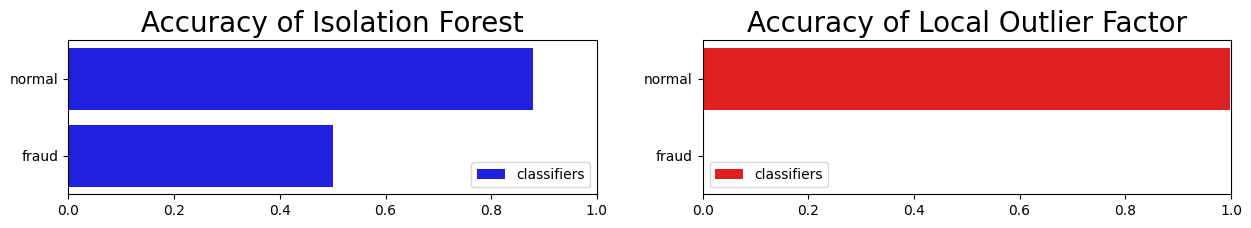

In [ ]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize=[15,2])

ax1.set_title("Accuracy of Isolation Forest",fontsize=20)
sns.barplot(x=[in_accuracy_isf,out_accuracy_isf],
            y=['normal', 'fraud'],
            label="classifiers",
            color="b",
            ax=ax1)
ax1.set(xlim=(0,1))

ax2.set_title("Accuracy of Local Outlier Factor",fontsize=20)
sns.barplot(x=[in_accuracy_lof,out_accuracy_lof],
            y=['normal', 'fraud'],
            label="classifiers",
            color="r",
            ax=ax2)
ax2.set(xlim=(0,1))
plt.show()

**CONCLUSION**

Both, Isolation Forest and Local Outlier Factor performed same in predicting Normal cases but Isolation Forest performed far better in detecting Fraud cases. So, Isolation Forest is a clear winner here!